In [14]:
import os
import pandas as pd

print(os.listdir())

df = pd.read_csv('../../Data/EV_Data.csv')
df.head()



['Analise_Exploratoria.ipynb']


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [22]:
print(f"Numero de Linhas: {len(df)}(DataPoints)")
print("--------------------------")
print(f"Tendo Colunas: ")

for col in df.columns:
    print(col)

print("--------------------------")

Numero de Linhas: 3798(DataPoints)
--------------------------
Tendo Colunas: 
region
category
parameter
mode
powertrain
year
unit
value
--------------------------


In [41]:
print("--------------------------")
print("Parametros distintos na coluna 'parameters':")
for param in df['parameter'].unique():
    print(param)
print("--------------------------")

--------------------------
Parametros distintos na coluna 'parameters':
EV sales
EV stock share
EV sales share
EV stock
Electricity demand
Oil displacement Mbd
Oil displacement, million lge
--------------------------


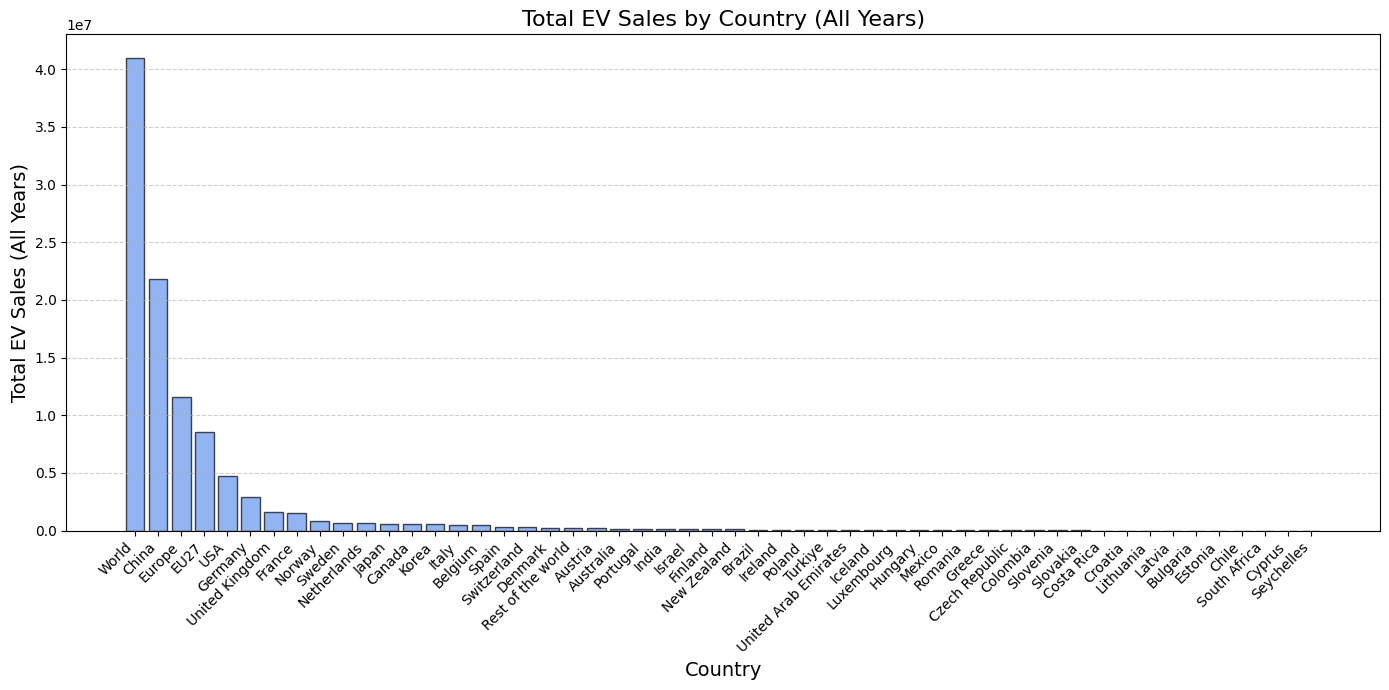

In [49]:

# Filtra apenas linhas com parâmetro 'EV sales'
ev_sales_df = df[df['parameter'] == 'EV sales'].copy()

# Agrupa por país, somando todas as vendas de todos os anos
country_sales = ev_sales_df.groupby('region')['value'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
plt.bar(country_sales.index, country_sales.values, color='cornflowerblue', edgecolor='black', alpha=0.7)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total EV Sales (All Years)', fontsize=14)
plt.title('Total EV Sales by Country (All Years)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

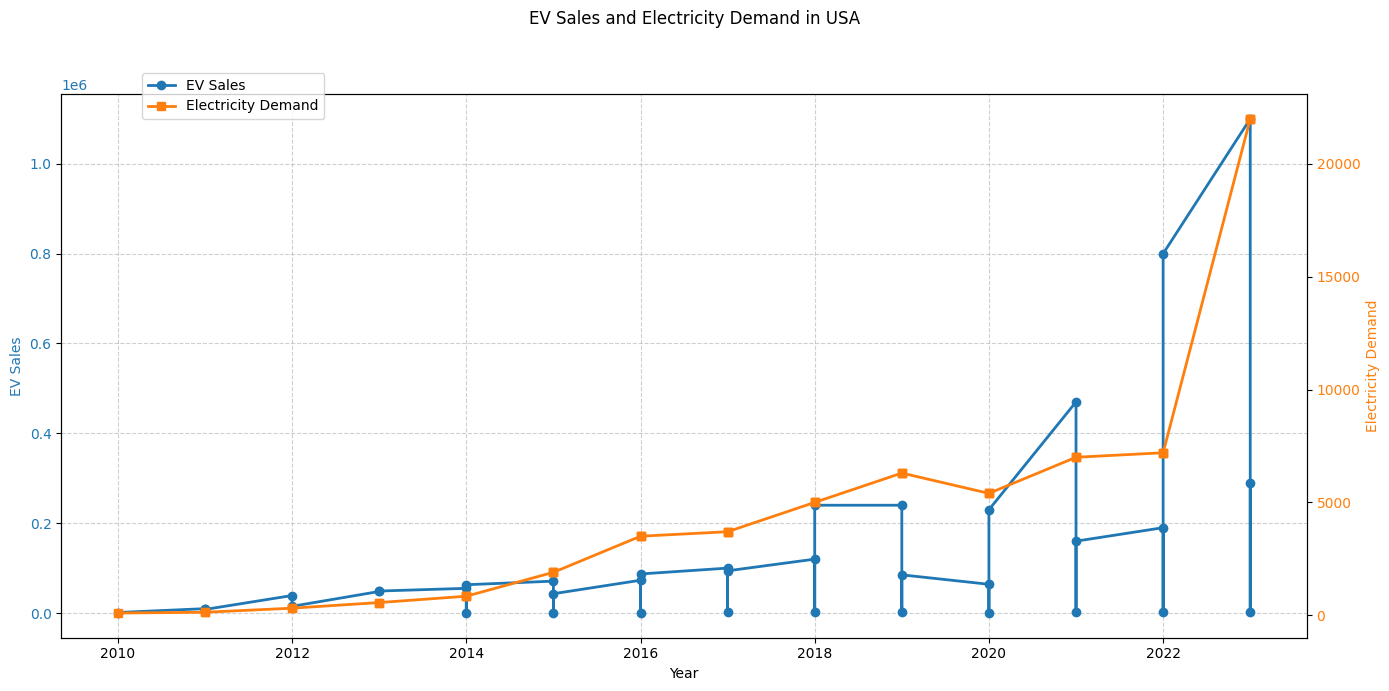

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Filter USA data
ev = (
    df[(df['parameter'] == 'EV sales') & (df['region'] == 'USA')]
    .drop(columns=['parameter','region'])
)
ed = (
    df[(df['parameter'] == 'Electricity demand') & (df['region'] == 'USA')]
    .drop(columns=['parameter','region'])
)

# 2. Merge on year
usa = pd.merge(ev, ed, on='year', suffixes=('_ev', '_ed')).sort_values('year')

# 3. Extract arrays
years       = usa['year']
ev_sales    = usa['value_ev']
elec_demand = usa['value_ed']

# 4. Mask out zero‐sales years for EV plot
mask_nonzero = ev_sales > 0

# 5. Plot
fig, ax1 = plt.subplots(figsize=(14, 7))

color_ev = 'tab:blue'
color_ed = 'tab:orange'

# EV Sales (only non-zero points)
l1, = ax1.plot(years[mask_nonzero],
               ev_sales[mask_nonzero],
               label='EV Sales',
               color=color_ev,
               marker='o',
               linewidth=2)
ax1.set_xlabel('Year')
ax1.set_ylabel('EV Sales', color=color_ev)
ax1.tick_params(axis='y', labelcolor=color_ev)
ax1.grid(True, linestyle='--', alpha=0.6)

# Electricity Demand (all years)
ax2 = ax1.twinx()
l2, = ax2.plot(years,
               elec_demand,
               label='Electricity Demand',
               color=color_ed,
               marker='s',
               linewidth=2)
ax2.set_ylabel('Electricity Demand', color=color_ed)
ax2.tick_params(axis='y', labelcolor=color_ed)

# Legend, title, layout
fig.legend(handles=[l1, l2],
           labels=['EV Sales', 'Electricity Demand'],
           loc='upper left',
           bbox_to_anchor=(0.1, 0.9))
fig.suptitle('EV Sales and Electricity Demand in USA')
fig.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()
